<a href="https://colab.research.google.com/github/arezyhs/Python-Digital-Image-Processing-Projects/blob/main/digital-image-processing-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 23051204335 && 23051204322
# Proses ini terdiri dari beberapa langkah berikut:
# 1. Deteksi Batas Dokumen: Menggunakan YOLOv8 untuk mendeteksi kontur dokumen, yang berfungsi sebagai langkah pertama.
# 2. Penciptaan Grid 2D Topologis: Menggunakan interpolasi polinomial kubik untuk mengoreksi distorsi dan menciptakan grid 2D yang meratakan dokumen.
# 3. Perbaikan Geometri Gambar: Remapping gambar asli berdasarkan grid interpolasi untuk memperoleh bentuk yang lebih mendekati dokumen aslinya.
# 4. Evaluasi OCR dan Pemulihan Geometri, menggunakan metrik OCR:
#       - Levenshtein distance,
#       - Jaro-Winkler similarity,
#       - Character Error Rate (CER)
#       - SSIM, MSE, dan NRMSE untuk mengukur kualitas pemulihan geometri dokumen.

In [ ]:
# Instal YOLOv8 dan pustaka terkait
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib
!pip install pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Saving 4a4d8d70ec74dcdab81c3c9dbd7f39ab-d8a8da858b9026685cea24634180442416937809519441.jpg to 4a4d8d70ec74dcdab81c3c9dbd7f39ab-d8a8da858b9026685cea24634180442416937809519441.jpg

0: 640x640 1 stop sign, 1 donut, 224.0ms
Speed: 9.4ms preprocess, 224.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


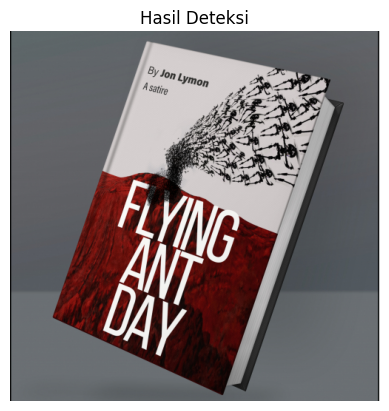

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([11., 54.])
conf: tensor([0.4810, 0.2631])
data: tensor([[5.2064e+01, 1.9035e+02, 3.6400e+02, 4.9293e+02, 4.8098e-01, 1.1000e+01],
        [2.1161e+02, 5.2105e+01, 4.3443e+02, 2.1563e+02, 2.6309e-01, 5.4000e+01]])
id: None
is_track: False
orig_shape: (500, 500)
shape: torch.Size([2, 6])
xywh: tensor([[208.0315, 341.6385, 311.9355, 302.5801],
        [323.0221, 133.8691, 222.8189, 163.5287]])
xywhn: tensor([[0.4161, 0.6833, 0.6239, 0.6052],
        [0.6460, 0.2677, 0.4456, 0.3271]])
xyxy: tensor([[ 52.0638, 190.3484, 363.9993, 492.9285],
        [211.6127,  52.1047, 434.4315, 215.6334]])
xyxyn: tensor([[0.1041, 0.3807, 0.7280, 0.9859],
        [0.4232, 0.1042, 0.8689, 0.4313]])


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')  # Gantilah dengan model yang sesuai jika diperlukan

# Mendapatkan path file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca gambar yang diunggah
img = cv2.imread(image_path)

# Deteksi dokumen
results = model(img)

# Menampilkan hasil deteksi dengan plot
results[0].plot()  # Menggunakan plot() pada hasil deteksi pertama

# Jika Anda ingin melihat gambar menggunakan matplotlib:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Hasil Deteksi")
plt.axis('off')
plt.show()

# Untuk melihat data deteksi lebih lanjut:
print(results[0].boxes)  # Menampilkan koordinat dan kelas yang terdeteksi

In [ ]:
# Menyaring hasil deteksi dan mendapatkan koordinat batas dokumen
boxes = results[0].boxes  # Mengambil hasil deteksi pada gambar pertama
coordinates = boxes.xywh  # Mengambil koordinat dalam format [x, y, width, height]

# Menampilkan koordinat deteksi
print("Koordinat Batas Dokumen:", coordinates)

Koordinat Batas Dokumen: tensor([[208.0315, 341.6385, 311.9355, 302.5801],
        [323.0221, 133.8691, 222.8189, 163.5287]])


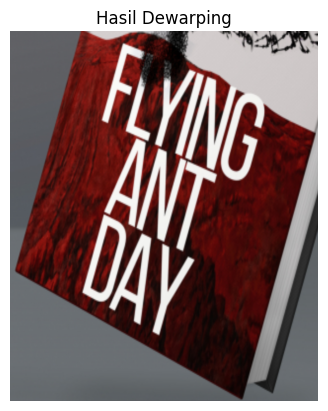

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mengambil koordinat deteksi pertama (asumsi hanya satu deteksi untuk sekarang)
coordinates = boxes.xywh  # [x_center, y_center, width, height]

# Mengubah koordinat dari [x_center, y_center, width, height] ke [xmin, ymin, xmax, ymax]
xmin = coordinates[0][0] - coordinates[0][2] / 2
ymin = coordinates[0][1] - coordinates[0][3] / 2
xmax = coordinates[0][0] + coordinates[0][2] / 2
ymax = coordinates[0][1] + coordinates[0][3] / 2

# Mendapatkan koordinat titik dalam urutan sesuai dengan perspektif (xmin, ymin, xmax, ymax)
pts1 = np.float32([[xmin, ymin], [xmax, ymin], [xmin, ymax], [xmax, ymax]])

# Tentukan ukuran gambar yang diinginkan untuk hasil dewarping
width, height = 1000, 1200
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Menghitung matriks transformasi perspektif
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Menerapkan transformasi perspektif
result_image = cv2.warpPerspective(img, matrix, (width, height))

# Menampilkan gambar yang sudah ter-dewarp
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Hasil Dewarping")
plt.axis('off')
plt.show()

In [ ]:
import pytesseract

# Menggunakan OCR untuk mengekstrak teks dari gambar yang telah di-dewarp
text = pytesseract.image_to_string(result_image)

# Menampilkan teks yang diekstrak
print("Teks yang diekstraksi:", text)

Teks yang diekstraksi:  



Saving 23051204332_Yakobus Octavianus Sucahyo Putra_TIJ23 conv 1.png to 23051204332_Yakobus Octavianus Sucahyo Putra_TIJ23 conv 1 (1).png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


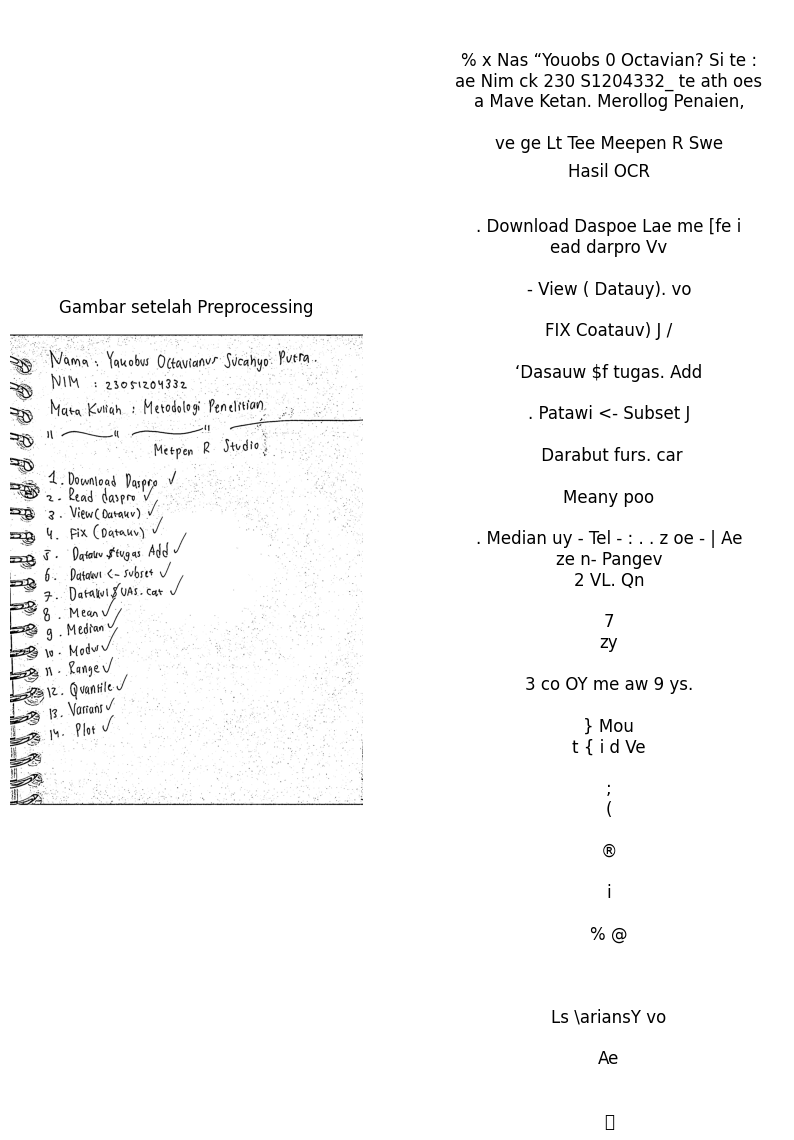

Teks yang berhasil diekstraksi: 
 

% x Nas “Youobs 0 Octavian? Si te :
ae Nim ck 230 S1204332_ te ath oes
a Mave Ketan. Merollog Penaien,

ve ge Lt Tee Meepen R Swe

 

. Download Daspoe Lae me [fe i
ead darpro Vv

- View ( Datauy). vo

FIX Coatauv) J /

‘Dasauw $f tugas. Add

. Patawi <- Subset J

 Darabut furs. car

Meany poo

. Median uy - Tel - : . . z oe - | Ae
ze n- Pangev
2 VL. Qn

7
zy

3 co OY me aw 9 ys.

} Mou
t { i d Ve

;
(

®

i

% @

   

Ls \ariansY vo

Ae

 



In [ ]:
# Langkah 1: Instalasi Libraries
!pip install pytesseract opencv-python matplotlib

# Langkah 2: Import Libraries
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Langkah 3: Upload Gambar
uploaded = files.upload()

# Ambil nama file gambar yang diupload
image_path = list(uploaded.keys())[0]

# Langkah 4: Membaca Gambar
img = cv2.imread(image_path)

# Langkah 5: Konversi Gambar ke Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Langkah 6: Noise Reduction (Pengurangan Noise)
# Gunakan GaussianBlur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Langkah 7: Thresholding (Menajamkan Teks)
# Menggunakan adaptive thresholding untuk membedakan teks dari background
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)

# Langkah 8: Menggunakan OCR untuk Ekstraksi Teks
# Gunakan pytesseract untuk ekstraksi teks dari gambar yang telah diproses
text = pytesseract.image_to_string(threshold, lang='eng')

# Menampilkan gambar yang diproses
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.title('Gambar setelah Preprocessing')
plt.axis('off')

# Langkah 9: Menampilkan Teks yang Dikenali
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, text, fontsize=12, ha='center', va='center')
plt.title('Hasil OCR')
plt.axis('off')

plt.show()

# Menampilkan teks yang diekstrak
print("Teks yang berhasil diekstraksi: ")
print(text)

In [4]:
!apt-get install tesseract-ocr -y
!apt-get install tesseract-ocr-ind
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Saving aRh8C.png to aRh8C (7).png
Hasil Threshold Otsu's Method pada Gambar: 


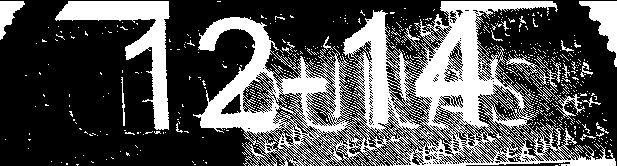

Hasil Distance Transform: 


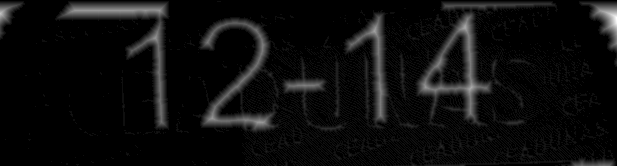

Hasil Threshold Otsu's Method pada Hasil Distance Transform: 


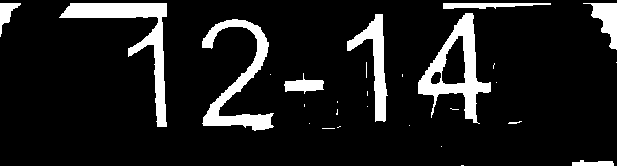

Hasil Opening Gambar: 


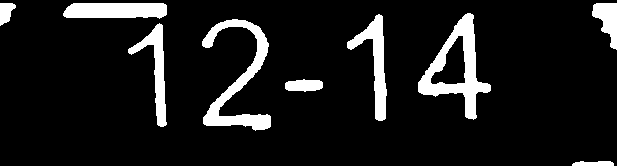

Hasil Convex Hull Mask Gambar: 


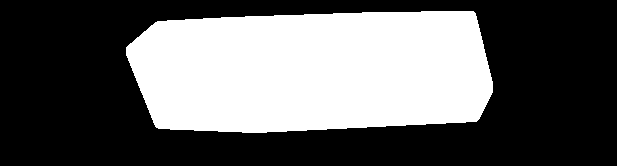

Hasil Teks OCR:  1214

Hasil Final: 


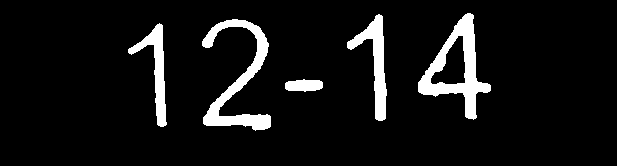

In [34]:
# import pustaka
import numpy as np
import pytesseract
import imutils
import cv2

# tambahan untuk Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

# unggah gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # mengambil nama file yang diunggah

# pipeline image processing
# upload gambar
image = cv2.imread(image_path)  # load image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # konversi ke grayscale

# threshold Otsu's method untuk image (pertama)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print("Hasil Threshold Otsu's Method pada Gambar: ")
cv2_imshow(thresh)  # output berupa teks yg di-ocr jadi putih.

# aplikasi distance transform untuk kalkulasi pixel 0 terdekat untuk setiap pixel pada image
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)  # thresh image pakai maskSize 5x5

# normalisasi distance transform yang berada di range [0,1].
# lalu konversi distance transform kembali ke unsigned 8-bit interger di range [0,255]
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")
print("Hasil Distance Transform: ")
cv2_imshow(dist)
# dari kode di atas, seharusnya distance transform mulai mengggambarkan digit text yang ada
# dikarenakan adanya distance yang luas dari foreground pixel dari background.

# threshold distance transform via Otsu's method (kedua)
# outsu ke dist map.
dist = cv2.threshold(dist, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print("Hasil Threshold Otsu's Method pada Hasil Distance Transform: ")
cv2_imshow(dist)

# aplikasi operasi morfologi (opening) untuk memisahkan komponen pada gambar.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(dist, cv2.MORPH_OPEN, kernel)
print("Hasil Opening Gambar: ")
cv2_imshow(opening)

# mencari contours pada image opening, lalu inisiaslisasi list contour
# yang dimiliki ke karakter OCR.
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)  # mencari contour dari noise dan karakter.
cnts = imutils.grab_contours(cnts)
chars = []

# looping pencarian countour untuk filtering
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# cek jika lebar countour 35px dengan tinggi 100px.
	# masukkan contour ke digit.
	if w >= 35 and h >= 100:
		chars.append(c)

# komputasi convex hull dari karakter
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

# alokasi memori untuk convex hull mask, lalu gambar convex hull pada image
# pada image untuk proses enlarge melalui dilasi.
mask = np.zeros(image.shape[:2], dtype="uint8")  # alokasi memori utk mask
cv2.drawContours(mask, [hull], -1, 255, -1)  # gambar convex hull pada digit
mask = cv2.dilate(mask, None, iterations=2)  # proses dilasi mask
print("Hasil Convex Hull Mask Gambar: ")
cv2_imshow(mask)

# ambil bitwise dari opening image lalu aplikasi mask untuk membuka
# hanya karakter pada image.
final = cv2.bitwise_and(opening, opening, mask=mask)

# proses OCR input image menggunakan Tesseract
# psm = memperlakukan gambar sebagai satu kata dgn Whitelist digit 0-9
options = "--psm 8 -c tessedit_char_whitelist=0123456789"
text = pytesseract.image_to_string(final, config=options)
print("Hasil Teks OCR: ", text)

# menampilkan hasil output image.
print("Hasil Final: ")
cv2_imshow(final)

In [37]:
!apt-get install tesseract-ocr -y
!apt-get install tesseract-ocr-ind
!pip install pytesseract
!pip install ultralytics

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 

In [40]:
!pip install opencv-contrib-python

In [52]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 32.0 MB/s eta 0:00:00


Saving testocr.png to testocr (11).png
Processing testocr (11).png...



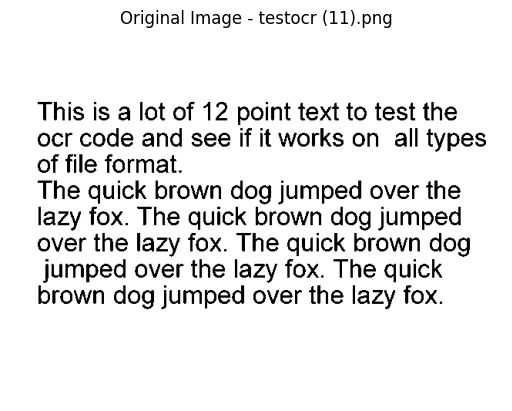

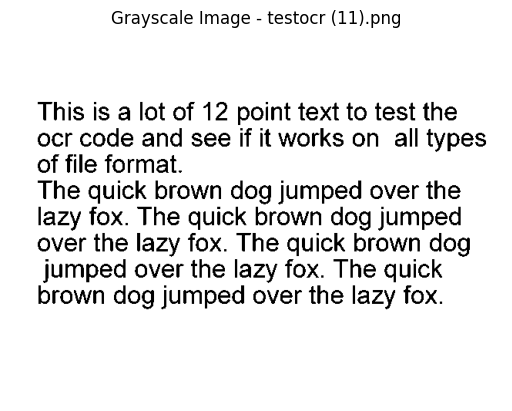

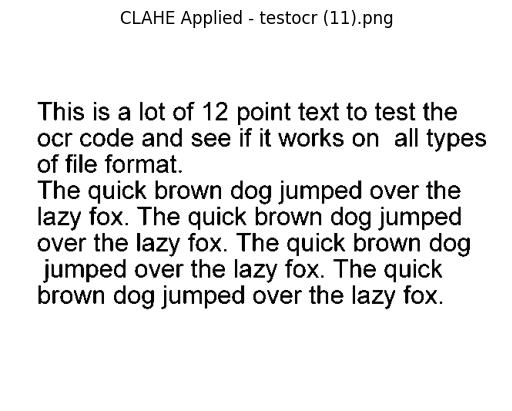

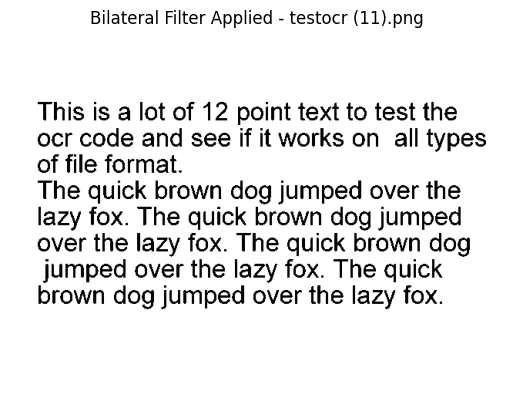

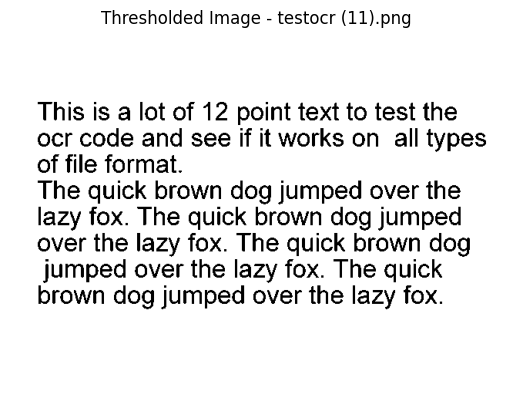

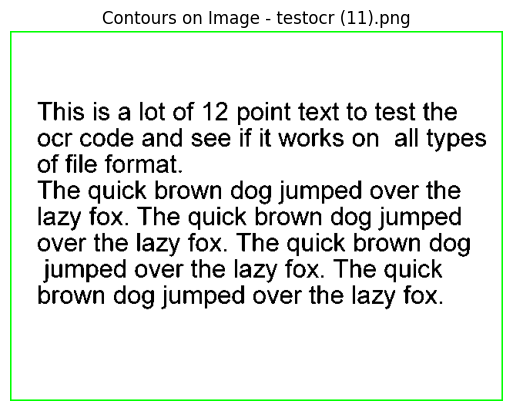

Extracted text from testocr (11).png:
This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.





{'testocr (11).png': 'This is a lot of 12 point text to test the\nocr code and see if it works on all types\nof file format.\n\nThe quick brown dog jumped over the\nlazy fox. The quick brown dog jumped\nover the lazy fox. The quick brown dog\njumped over the lazy fox. The quick\nbrown dog jumped over the lazy fox.\n\x0c'}

In [86]:
import cv2
import pytesseract
from google.colab import files
from matplotlib import pyplot as plt

# Function to upload images
def upload_images():
    uploaded = files.upload()
    image_paths = list(uploaded.keys())
    return image_paths

# Function to show image using matplotlib
def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to process image and extract text
def extract_text_from_image(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Show the original image
    show_image(image, f"Original Image - {image_path}")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    show_image(gray, f"Grayscale Image - {image_path}")

    # Apply adaptive histogram equalization (CLAHE) to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    show_image(gray, f"CLAHE Applied - {image_path}")

    # Apply a bilateral filter to reduce noise while preserving edges
    denoised = cv2.bilateralFilter(gray, 9, 75, 75)
    show_image(denoised, f"Bilateral Filter Applied - {image_path}")

    # Apply adaptive thresholding to improve text extraction in varied lighting
    thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    show_image(thresh, f"Thresholded Image - {image_path}")

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    show_image(contour_image, f"Contours on Image - {image_path}")

    # Use pytesseract to extract text
    text = pytesseract.image_to_string(thresh, config='--oem 3 --psm 6')

    return text

# Upload images
image_paths = upload_images()

# Process each uploaded image
extracted_texts = {}
for image_path in image_paths:
    print(f"Processing {image_path}...\n")
    text = extract_text_from_image(image_path)
    extracted_texts[image_path] = text
    print(f"Extracted text from {image_path}:")
    print(text)
    print("\n" + "="*50 + "\n")

# Display the extracted texts for all images
extracted_texts

In [89]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.transform import rotate
from skimage.filters import sobel
from skimage.util import invert
from google.colab import files

# Fungsi untuk mengunggah gambar
def upload_image():
    uploaded = files.upload()
    image_paths = list(uploaded.keys())
    return image_paths[0]

# Fungsi untuk memproses gambar dan menampilkan hasil
def process_image(image_path):
    # Membaca gambar dan mengonversinya ke grayscale
    img = rgb2gray(imread(image_path))

    # Menampilkan gambar asli
    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray")
    plt.title("Original Grayscale Image")
    plt.axis("off")
    plt.show()

    # Terapkan Sobel untuk deteksi tepi
    sobel_image = invert(sobel(img))
    plt.figure(figsize=(10, 5))
    plt.imshow(sobel_image, cmap="gray")
    plt.title("Sobel Edge Detection")
    plt.axis("off")
    plt.show()

    # Fungsi untuk menghitung proyeksi horizontal
    def horizontal_projections(sobel_image):
        sum_of_cols = []
        rows, cols = sobel_image.shape
        for row in range(rows-1):
            sum_of_cols.append(np.sum(sobel_image[row,:]))
        return sum_of_cols

    # Mencari sudut rotasi terbaik berdasarkan proyeksi horizontal
    predicted_angle = 0
    highest_hp = 0
    for angle in range(-10, 10):
        hp = horizontal_projections(rotate(sobel_image, angle, cval=1))
        median_hp = np.median(hp)
        if highest_hp < median_hp:
            predicted_angle = angle
            highest_hp = median_hp

    # Menampilkan gambar asli dan gambar setelah rotasi berdasarkan sudut terbaik
    fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
    ax[0].set_title('Original Image Grayscale')
    ax[0].imshow(img, cmap="gray")
    ax[1].set_title(f'Rotated Image by Angle {predicted_angle}')
    ax[1].imshow(rotate(img, predicted_angle, cval=1), cmap="gray")
    plt.show()

# Mengunggah gambar dan memprosesnya
image_path = upload_image()
process_image(image_path)

Saving F921G4IIJX58MRB.LARGE_.jpg to F921G4IIJX58MRB.LARGE_ (1).jpg


ValueError: the input array must have size 3 along `channel_axis`, got (1024, 804)